# Recurrent Neural Networks with TensorFlow
Applying an RNN to MNIST.  
Important to get the input shape right - RNN takes a 3-dimensional input typically [batch_size, timestamps, feature], since RNN are built to perform on sequential data.  
MNIST is obviously not sequential data, but an RNN can still be applied, yielding improvements over a basic MLP.  
Thus, we may have to reshape the MNIST dataset. In this case, it comes in 3-d form [60000, 28, 28], which corresponds to 60,000 arrays each with 28 rows and 28 columns (28x28 matrices). In other words, for every sample out of the 60,000 training samples, an image is 28 pixels wide and 28 tall. We can pass this 3d form right into an LSTM layer. (On Kaggle, need to convert the flat array of pixels back into this 3d form).  
Also note that y_train comes as a vector of sparse labels. Technically, we should convert this to a one-hot encoded vector with shape [60000, 10] - 10 corresponding to the 10 classes.   

In [23]:
# Recurrent Neural Networks with TensorFlow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# MNIST example
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 

In [29]:
print("Training Data Shape: ", X_train.shape)
print("Single image shape: ", X_train[1,].shape)
print("y_train.shape: ", y_train.shape)

Training Data Shape:  (60000, 28, 28)
Single image shape:  (28, 28)
y_train.shape:  (60000,)


In [14]:
X_train[0].shape

(28, 28)

In [17]:
# As with an MLP, we first build/define a sequential model
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = (28, 28)), ##flatten the 28X28 image into a single array
    tf.keras.layers.Input(shape=X_train[0].shape), ##shape=(28,28)
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(10) ##add output layer with 10 nodes for 10 classes
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               80384     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [19]:
weights = model.get_weights()
reset_model = lambda model: model.set_weights(weights) ##lambda fn to reset model weights to randomly initialized

#Note: since we didn't one hot encode the y labels, they are considered sparse. So need to use sparse cat crossent
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ##softmax activartion not yet applied, logits = T

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [21]:
reset_model(model)
hist = model.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4748 - accuracy: 0.8409 - val_loss: 0.1165 - val_accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1031 - accuracy: 0.9691 - val_loss: 0.0766 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0641 - val_accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0584 - val_accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0589 - val_accuracy: 0.9826


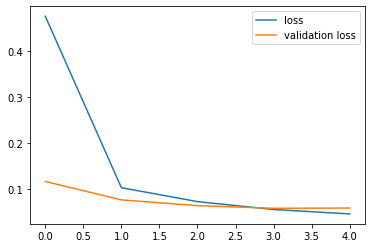

In [24]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

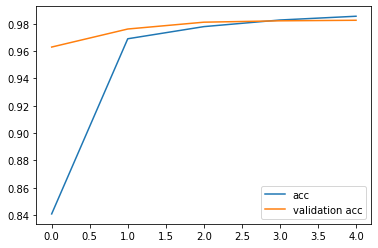

In [25]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()